# Project Foundations for Data Science: FoodHub Data Analysis

## Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

## Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

## Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

## Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

## Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
#returns last 5 rows of the data frame
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [6]:
#returns the number of rows and columns startinf from 0
df.shape

(1898, 9)

 - There are a total of 1898 rows and 9 columns


In [7]:
# function that returns data types and count of non-null(with values) of a column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:
1. There are no missing values in any of the rows as indicated by the 1898 non-null status
2. 5 columns are numeric i.e int64 and float64 data types and 4 other columns are texts or strings denoted as object

In [8]:
# is null function identifies missing values per column and the sum function finds the total number
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
1. There are no missing values in any of the rows of the data as all rows return the value of zero 

In [9]:
df['food_preparation_time'].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

### Observations:
- The average food preparation time is 27.7 minutes
- The minimum food preparation time is 20.0 minutes
- The maximum food preparation time is 35.0 minutes

In [10]:
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
1. 736 out of 1898 orders have a 'Not given' status on the rating 

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Histograms and Boxplots for: Cost of Order, Food preparation time and Delivery time in a grid

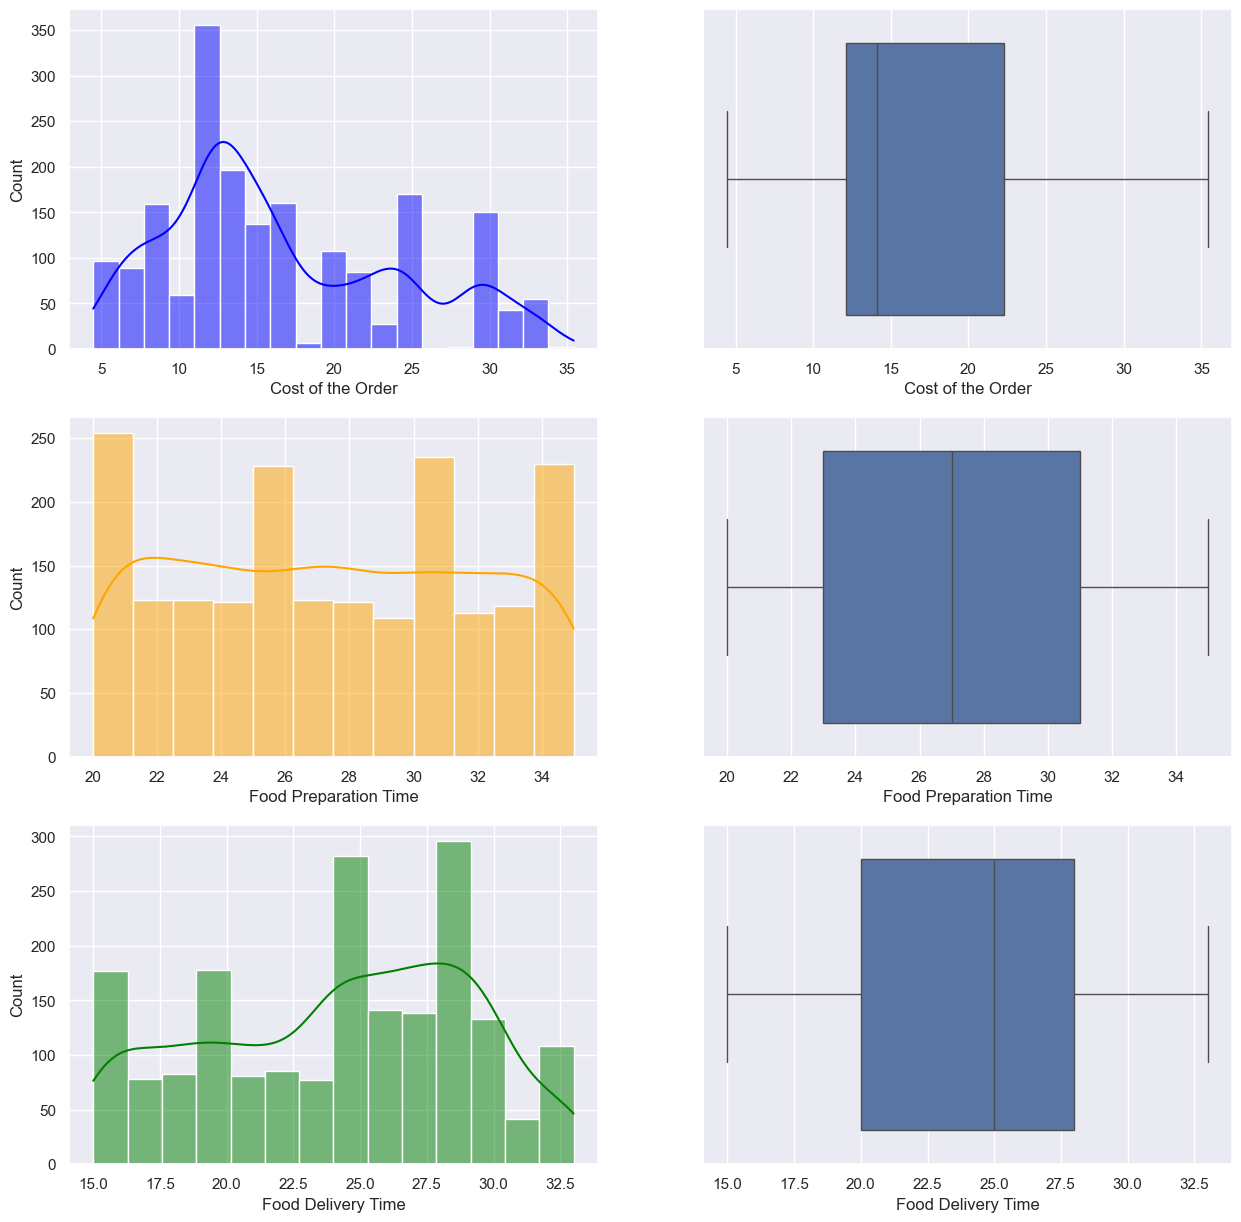

In [12]:
sns.set(style='darkgrid')
sns.set(font_scale=1)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(data=df, x= 'cost_of_the_order', kde=True, color='blue', ax=axs[0, 0]).set_xlabel('Cost of the Order')
sns.boxplot(data=df, x= 'cost_of_the_order', ax=axs[0, 1]).set_xlabel('Cost of the Order')
sns.histplot(data=df, x='food_preparation_time', kde=True, color='orange', ax=axs[1, 0]).set_xlabel('Food Preparation Time')
sns.boxplot(data=df, x='food_preparation_time', ax=axs[1, 1]).set_xlabel('Food Preparation Time')
sns.histplot(data=df, x='delivery_time', kde=True, color='green', ax=axs[2, 0]).set_xlabel('Food Delivery Time')
sns.boxplot(data=df, x='delivery_time', ax=axs[2, 1]).set_xlabel('Food Delivery Time')
plt.show()


#### Countplot by Cuisine Type

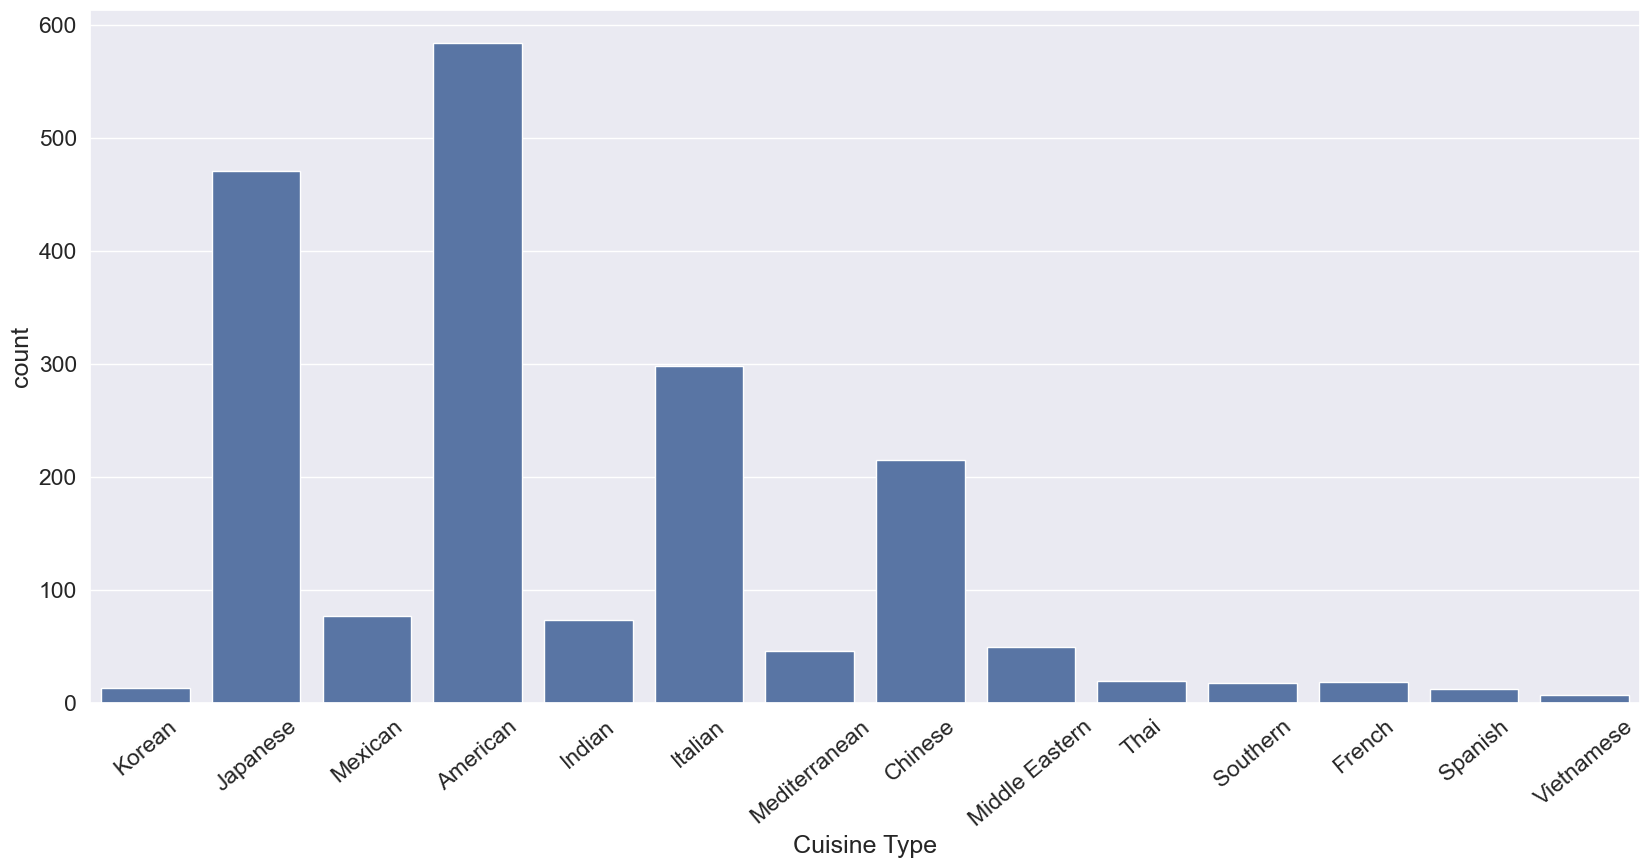

In [13]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,9))
sns.set(font_scale=1.5)
sns.countplot(data=df, x='cuisine_type')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 40)

plt.show()

#### Orders during the week in comparison to orders during the weekend

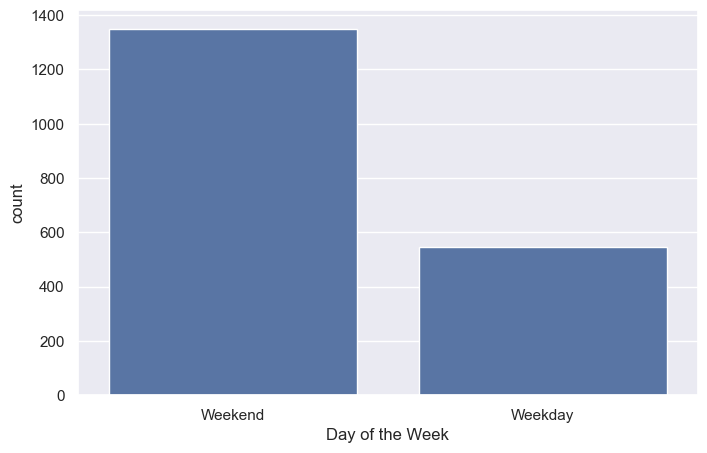

In [14]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.countplot(data=df, x='day_of_the_week').set_xlabel('Day of the Week')

plt.show()

#### Comparison of the ratings given

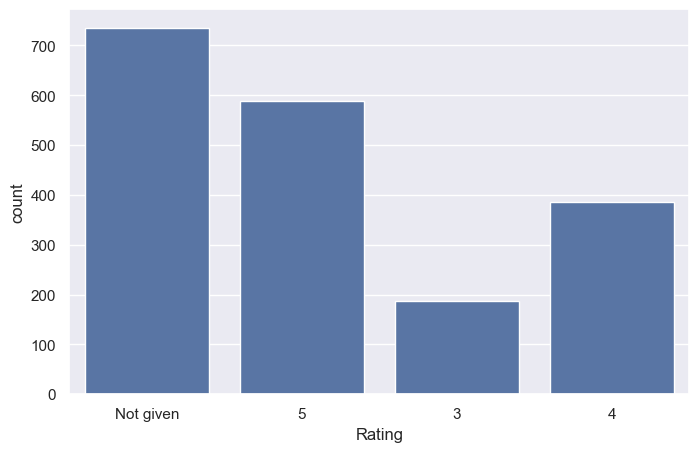

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.countplot(data=df, x='rating').set_xlabel('Rating')

plt.show()

#### Top 5 restaurants by number of orders received

In [16]:
Top_5_rest = df.restaurant_name.value_counts()
Top_5_rest.head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

#### Most popular cuisine on weekends

In [17]:
df.day_of_the_week.value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [18]:
#filtering the dataframe using loc to filter out weekday rows and counting the rows unde the cuisine type category
df_pop_cus_wkd =df.loc[df.day_of_the_week=='Weekend',:].cuisine_type.value_counts(sort=True)
df_pop_cus_wkd.head(10)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Name: count, dtype: int64

- American cuisine is the most popular on weekends with 415 orders 

#### Percentage of orders that cost more than 20 dollars

In [19]:
'''
filtering out values less than 20 and adding the remaining using sum function, 
diving the result by the 0 index of the shape of the data frame'''
print (round(((sum(df.cost_of_the_order > 20)/df.shape[0]))*100, 2),'% of the orders cost more than 20 dollars')


29.24 % of the orders cost more than 20 dollars


#### Mean order delivery time

In [20]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [21]:
print('The mean order delivery time is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean order delivery time is 24.16 minutes


#### Top most Frequent customers ID

In [22]:
#finding the IDs with the highest counts using value_counts function
Top_cust = df.customer_id.value_counts(sort=True)
print('The top 3 most frequent customers are:\n', Top_cust.head(3))

The top 3 most frequent customers are:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


### Multivariate Analysis

In [23]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Cusine against the Cost 

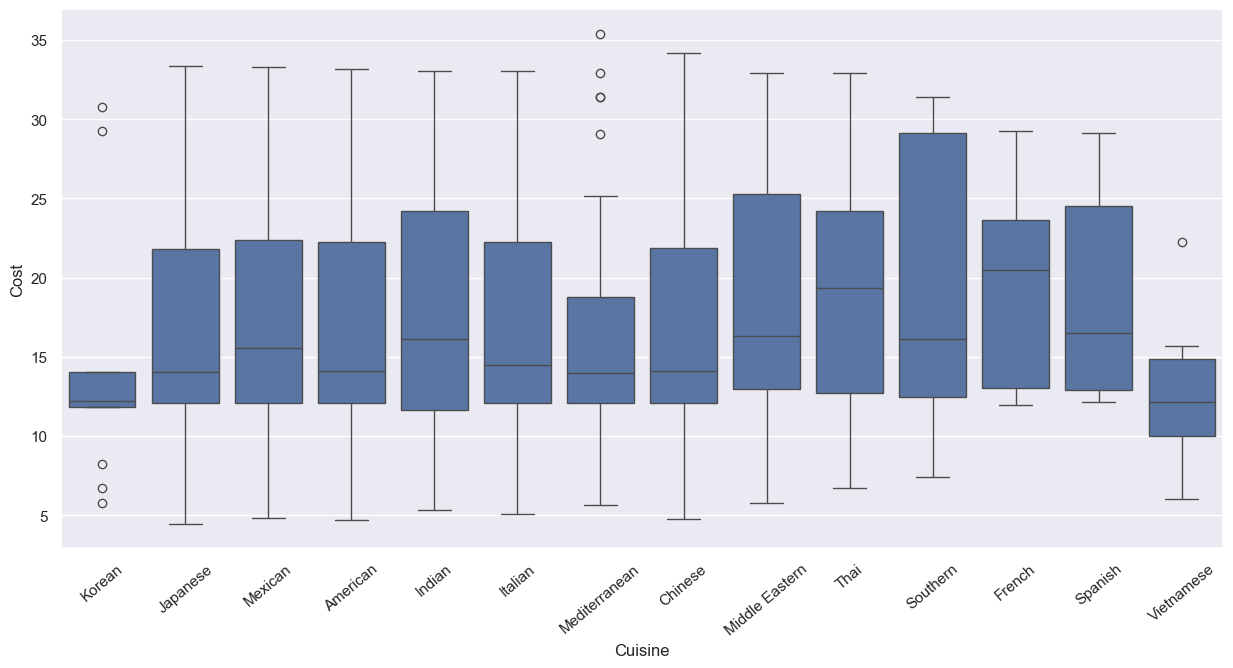

In [24]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,7))
sns.set(font_scale=1)
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xlabel('Cuisine')
plt.ylabel('Cost')
plt.xticks(rotation = 40)
plt.show()

#### Cuisine against Preparation time

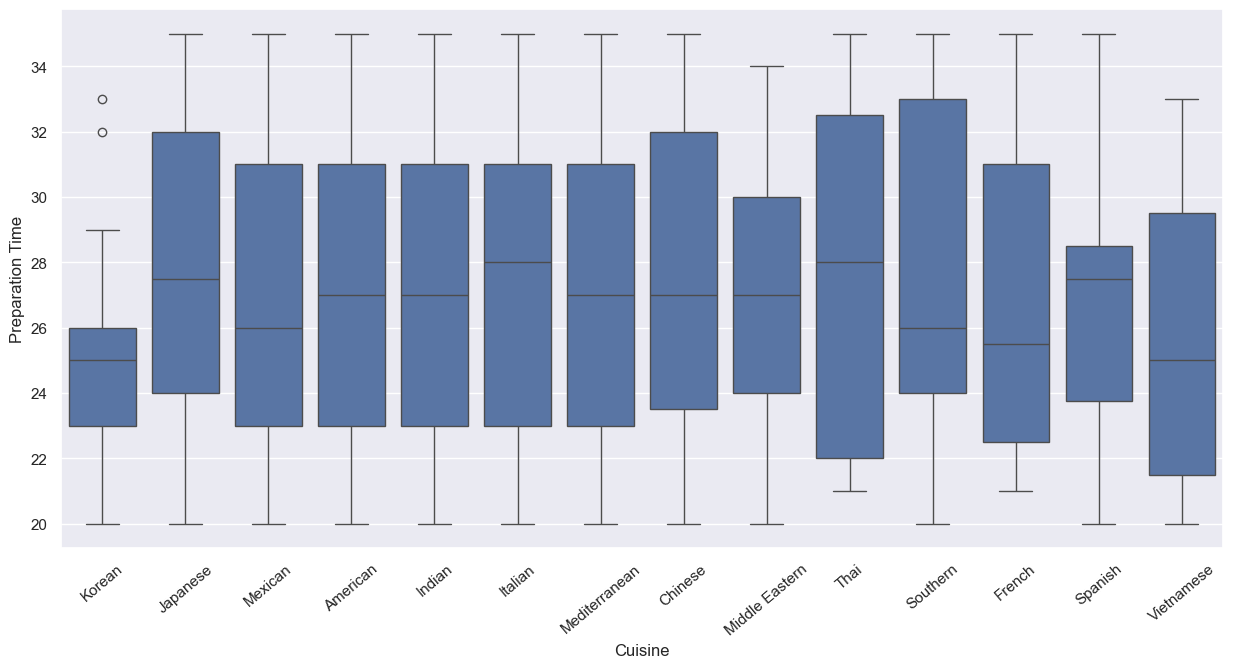

In [25]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,7))
sns.set(font_scale=1)
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time')
plt.xlabel('Cuisine')
plt.ylabel('Preparation Time')
plt.xticks(rotation = 40)
plt.show()

#### Day of the week against Preparation time

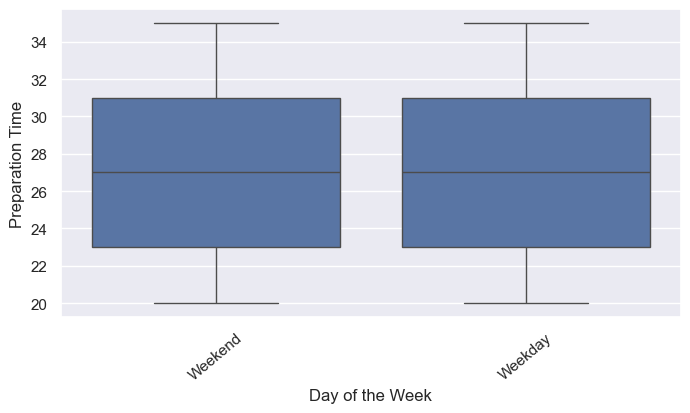

In [26]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,4))
sns.set(font_scale=1)
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time')
plt.xlabel('Day of the Week')
plt.ylabel('Preparation Time')
plt.xticks(rotation = 40)
plt.show()

#### Day of the Week against Delivery time

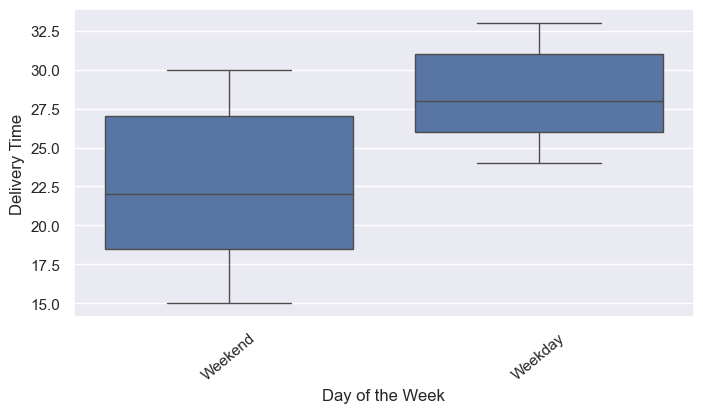

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,4))
sns.set(font_scale=1)
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.xticks(rotation = 40)
plt.show()

####  Total revenue during the weekend vs total revenue during the week and the average cost of a meal during the periods

In [28]:
print(df.groupby(['day_of_the_week'])['cost_of_the_order'].sum().sort_values(ascending = False))
print(df.groupby(['day_of_the_week'])['cost_of_the_order'].mean().sort_values(ascending = False))

day_of_the_week
Weekend    22392.60
Weekday     8922.22
Name: cost_of_the_order, dtype: float64
day_of_the_week
Weekend    16.574833
Weekday    16.311188
Name: cost_of_the_order, dtype: float64


#### Total revenue for each restaurant

In [29]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

In [30]:
# Filtering out unrated rows
df1=df.copy()
Sel_rating = df1.loc[df.rating != 'Not given', :]

In [31]:
# Converting the rating column data type from string to integer for calculation
Sel_rating['rating'] = Sel_rating['rating'].astype('int')
Sel_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


#### Rating against Delivery time

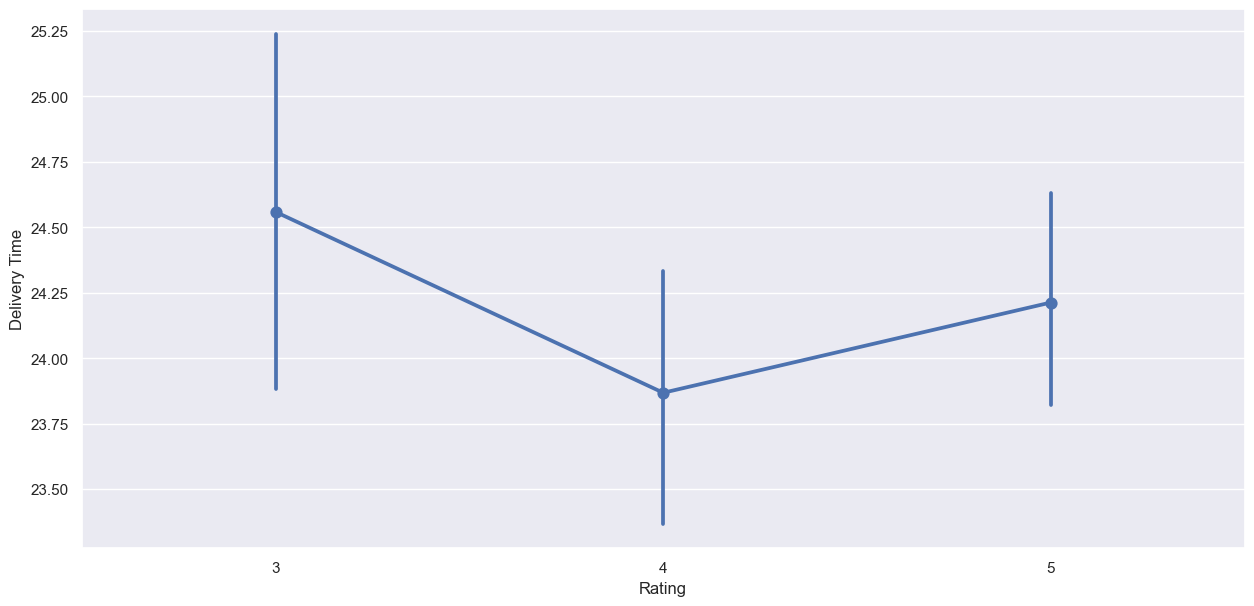

In [32]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 7))
sns.pointplot(data = Sel_rating, x = 'rating', y = 'delivery_time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

#### Rating against Preparation time

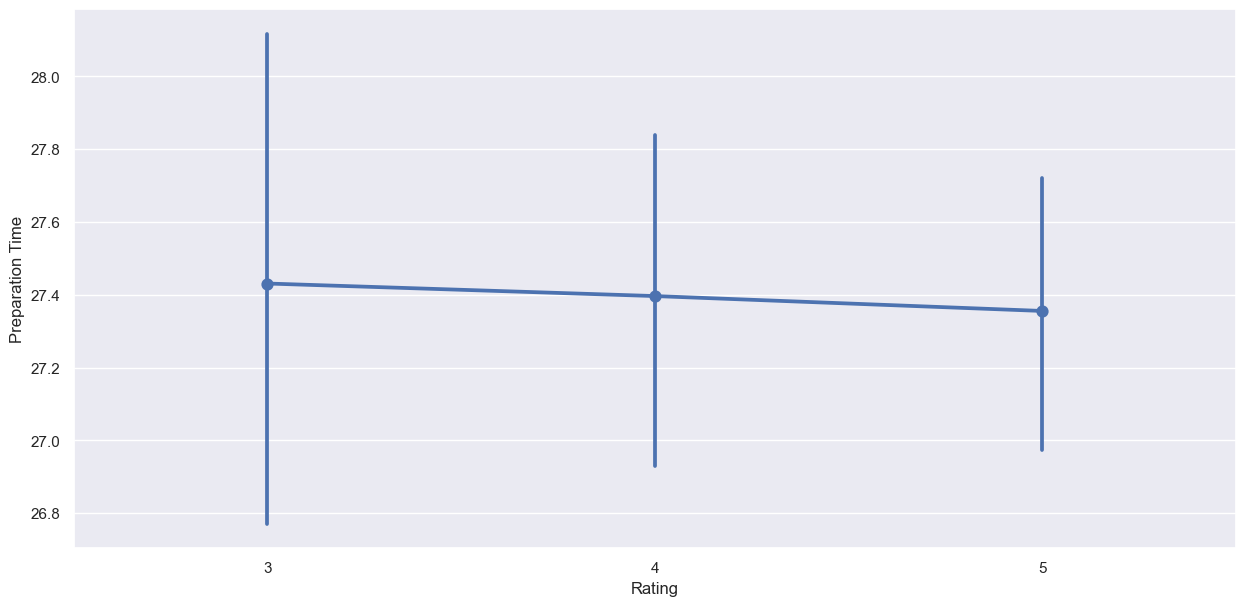

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 7))
sns.pointplot(data = Sel_rating, x = 'rating', y = 'food_preparation_time')
plt.xlabel('Rating')
plt.ylabel('Preparation Time')
plt.show()

#### Rating against cost of the order

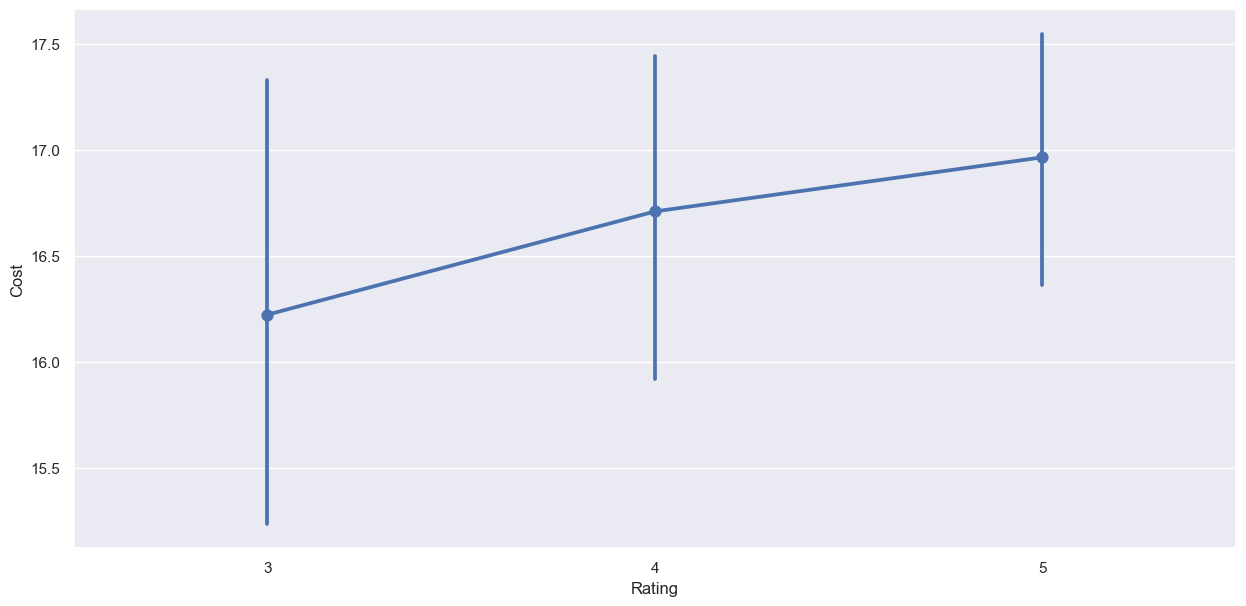

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 7))
sns.pointplot(data = Sel_rating, x = 'rating', y = 'cost_of_the_order')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.show()

#### Correlation of the various varriables

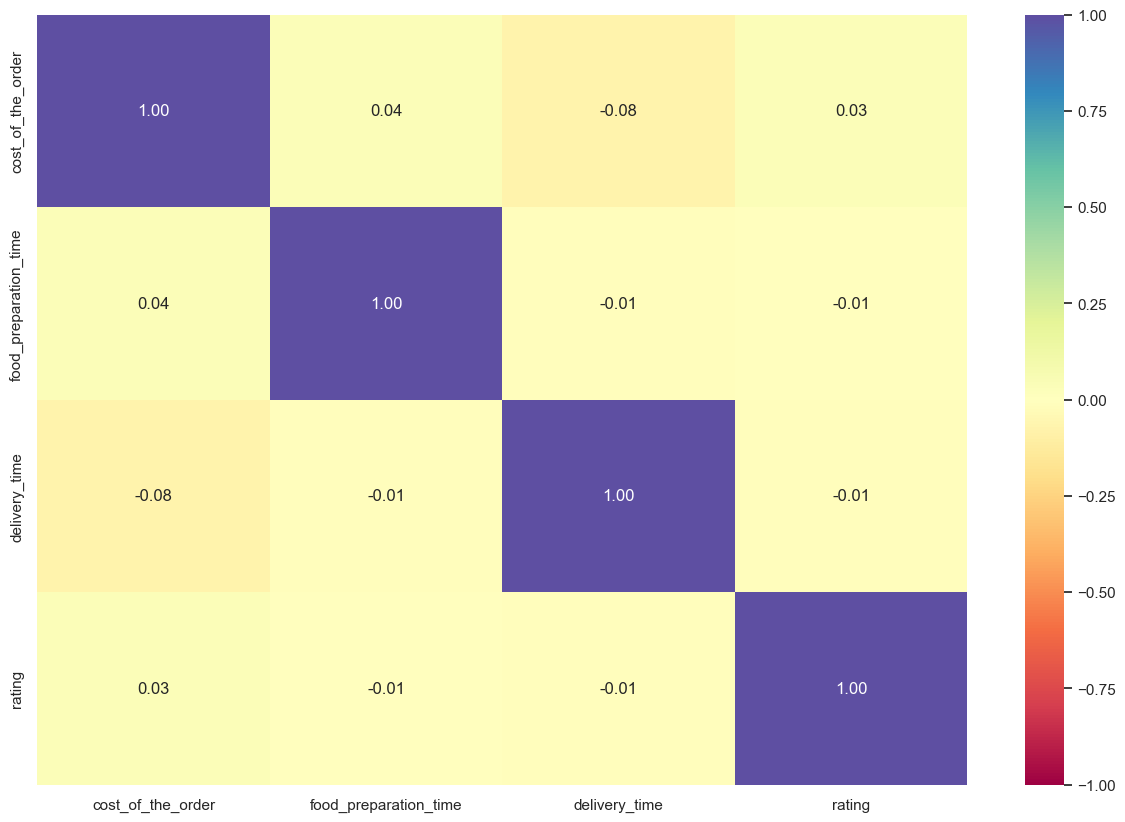

In [35]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(15, 10))
sns.heatmap(Sel_rating[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [36]:
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [42]:
print(Sel_rating.info())
print(Sel_rating.head())
Sel_rating = df1.loc[df.rating != 'Not given', ['restaurant_name','rating']]
Sel_rating['rating']=Sel_rating['rating'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  1162 non-null   object
 1   rating           1162 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 22.7+ KB
None
             restaurant_name  rating
2                Cafe Habana       5
3  Blue Ribbon Fried Chicken       3
4           Dirty Bird to Go       4
5           Tamarind TriBeCa       3
7                  Barbounia       3


In [43]:
result=Sel_rating.groupby('restaurant_name').filter(lambda x: len(x) > 50)
print (Sel_rating.shape)
print(result)

(1162, 2)
                restaurant_name  rating
3     Blue Ribbon Fried Chicken       3
12    Blue Ribbon Fried Chicken       5
15                  Shake Shack       5
19            Blue Ribbon Sushi       4
22                  Shake Shack       5
...                         ...     ...
1880                Shake Shack       5
1884                Shake Shack       3
1885                Shake Shack       4
1886          The Meatball Shop       5
1888          The Meatball Shop       5

[354 rows x 2 columns]


In [44]:
result.restaurant_name.unique()

array(['Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi',
       'The Meatball Shop'], dtype=object)

In [45]:
print('The restaurants eligible for a promotional offer in advertisements are:\'', result.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False))

The restaurants eligible for a promotional offer in advertisements are:' restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64


## The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [46]:
def rev_calc(r):
     if r > 20:
        return r*0.25
     elif r > 5:
        return r*0.15
     else:
        return r*0

In [47]:
df['revenue'] =df.cost_of_the_order.apply(rev_calc)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [48]:
Cst_ab_20 = df.loc[df.cost_of_the_order >20, :]
Cst_ab_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575
...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,7.8575
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,7.2625
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,7.2875
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775


In [49]:
Cst_ab_5 = df.loc[(df.cost_of_the_order >5) & (df.cost_of_the_order < 20), :]

In [50]:
print('The net revenue generated by the company across all orders is:\n',df['revenue'].sum(),'$')


The net revenue generated by the company across all orders is:
 6166.303 $


## The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered


In [51]:
df.columns
# Write the code here

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'revenue'],
      dtype='object')

In [52]:
df['total_time'] = df.food_preparation_time + df.delivery_time
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [53]:
Order_over60min = df.loc[df.total_time >60, :]
Order_over60min

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.0955,62


In [54]:
print (round (Order_over60min.shape[0]/df.shape[0] *100, 2),'% of the orders take more than 60 minutes to get delivered from the time the order is placed') 

10.54 % of the orders take more than 60 minutes to get delivered from the time the order is placed


## The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [57]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'revenue', 'total_time'],
      dtype='object')

In [58]:
print( 'The mean delivery times during the weekdays and weekends compare as follows:\n',df.groupby(['day_of_the_week'])['delivery_time'].mean())

The mean delivery times during the weekdays and weekends compare as follows:
 day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
- On Average delivery time during weekends is shorter than that of weekdays


# Conclusion and Recommendations

## Conclusions:
* There are more orders and hence more revenue generated during weekends as opposed to week days nearly 3 times more
* The Average delivery time during the week is higher than that of the weekend despite the increased number of orders during the weekend
* 50% of the orders cost between 12 and 22 dollars.
* There is a notable negative correlation between the delivery time and the cost of the order.
* American, Japanese, Italian and Chinese are the most popular cuisines which also happen to have similar price ranges

## Recommendations:

* The company/app should improve the weekday delivery time since this as indicated by the rating is a consideration customers make.
* The company/app should target/include more restaurants with a 12 to 22 dollar prices range so as to offer more variety to it's users who make most orders around this price range.
* The company/app should target/include more American, Japanese, Italian and Japanese cuisine as they make majority of the orders.


---